In [50]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import json

In [33]:
pd.options.display.max_columns = None

## Load Training Data

In [3]:
data_dir = Path.cwd().parent / 'DATA'

In [5]:
train_data = data_dir / 'train_data.parquet'

In [6]:
train_df = pd.read_parquet(train_data)
print(f"training dataframe -> rows: {train_df.shape[0]}, cols: {train_df.shape[1]}")

training dataframe -> rows: 375734, cols: 246


In [91]:
TARGET = 'contest-tmp2m-14d__tmp2m'

## Load Grouped Columns

In [11]:
cols_file = 'artifacts/columns.json'
print("Column Group (n) \n---------------")
with open(cols_file, 'r') as js_in:
    groups_cols = json.load(js_in)
    for group, col_list in groups_cols.items():
        print(f"{group}: {len(col_list)}")

Column Group (n) 
---------------
info: 3
geography: 4
precip: 4
nmme0: 30
wind-h: 44
nmme: 40
pressure: 2
wind-v: 42
wind-u: 42
temp_forecast: 10
mjo: 2
mei: 3
sst: 10
icec: 10


In [12]:
keep_groups = ['info', 'geography', 'precip', 'pressure', 'temp-forecast', 'mjo', 'mei']

In [42]:
keep_cols = []
for group, col_list in groups_cols.items():
    if group in keep_groups:
        keep_cols.extend(col_list)
    else:
        for col_nm in col_list:
            if col_nm.find('2010-10') > -1 or col_nm.find('contest') > -1:
                keep_cols.append(col_nm)
keep_cols.remove('index')
print(f"Keep columns: {len(keep_cols)}")

Keep columns: 35


In [43]:
train_df['location'] = list(zip(train_df.lat, train_df.lon))

In [44]:
COORD = 0.5

In [77]:
sngl_lctn_df = train_df.loc[train_df['location'] == (COORD, COORD), keep_cols]
sngl_lctn_df = sngl_lctn_df.reset_index(drop=True)
n_rows, n_cols = sngl_lctn_df.shape
print(f"single location sample -> rows: {n_rows}, cols: {n_cols}")

single location sample -> rows: 731, cols: 35


In [83]:
LEVELS = 50

In [86]:
const_cols = []
cat_cols = []
print("colunms: levels\n-------------")
for col in sngl_lctn_df.columns:
    n_levels = len(sngl_lctn_df[col].unique())
    if n_levels == 1:
        const_cols.append(col)
    elif n_levels <= LEVELS:
        cat_cols.append(col)
    print(f"{col}:\t{n_levels}")

colunms: levels
-------------
startdate:	731
contest-tmp2m-14d__tmp2m:	731
lat:	1
lon:	1
climateregions__climateregion:	1
elevation__elevation:	1
contest-pevpr-sfc-gauss-14d__pevpr:	723
contest-rhum-sig995-14d__rhum:	692
contest-prwtr-eatm-14d__prwtr:	541
contest-precip-14d__precip:	562
contest-wind-h10-14d__wind-hgt-10:	724
contest-wind-h100-14d__wind-hgt-100:	726
contest-wind-h850-14d__wind-hgt-850:	704
contest-wind-h500-14d__wind-hgt-500:	722
wind-hgt-850-2010-10:	730
wind-hgt-500-2010-10:	731
wind-hgt-10-2010-10:	731
wind-hgt-100-2010-10:	730
contest-slp-14d__slp:	729
contest-pres-sfc-gauss-14d__pres:	728
contest-wind-vwnd-925-14d__wind-vwnd-925:	263
contest-wind-vwnd-250-14d__wind-vwnd-250:	625
wind-vwnd-250-2010-10:	722
wind-vwnd-925-2010-10:	710
contest-wind-uwnd-250-14d__wind-uwnd-250:	637
contest-wind-uwnd-925-14d__wind-uwnd-925:	240
wind-uwnd-250-2010-10:	727
wind-uwnd-925-2010-10:	717
mjo1d__phase:	8
mjo1d__amplitude:	251
mei__mei:	25
mei__meirank:	14
mei__nip:	2
sst-2010-10

In [88]:
drop_cols = const_cols + cat_cols
print(f"constants: {const_cols}")
print(f"categorical: {cat_cols}")

constants: ['lat', 'lon', 'climateregions__climateregion', 'elevation__elevation']
categorical: ['mjo1d__phase', 'mei__mei', 'mei__meirank', 'mei__nip']


In [89]:
sngl_lctn_df.drop(columns=drop_cols).describe()

,contest-tmp2m-14d__tmp2m,contest-pevpr-sfc-gauss-14d__pevpr,contest-rhum-sig995-14d__rhum,contest-prwtr-eatm-14d__prwtr,contest-precip-14d__precip,contest-wind-h10-14d__wind-hgt-10,contest-wind-h100-14d__wind-hgt-100,contest-wind-h850-14d__wind-hgt-850,contest-wind-h500-14d__wind-hgt-500,wind-hgt-850-2010-10,wind-hgt-500-2010-10,wind-hgt-10-2010-10,wind-hgt-100-2010-10,contest-slp-14d__slp,contest-pres-sfc-gauss-14d__pres,contest-wind-vwnd-925-14d__wind-vwnd-925,contest-wind-vwnd-250-14d__wind-vwnd-250,wind-vwnd-250-2010-10,wind-vwnd-925-2010-10,contest-wind-uwnd-250-14d__wind-uwnd-250,contest-wind-uwnd-925-14d__wind-uwnd-925,wind-uwnd-250-2010-10,wind-uwnd-925-2010-10,mjo1d__amplitude,sst-2010-10,icec-2010-10
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,9.865088,236.731395,60.507989,9.328249,17.392367,31053.787989,16429.943776,1509.040096,5756.991628,272.871518,-1172.818495,1094.103297,413.487223,101732.856758,79133.962681,0.578605,-0.048865,0.362668,6.560684,17.663611,0.615732,-7.673912,0.741724,1.301122,21.688933,0.127031
std,8.908607,181.406831,17.459226,4.015639,14.793967,320.704675,180.873864,20.011486,111.160937,619.919910,962.075978,1932.365867,1611.081304,368.042474,266.437979,0.711133,7.675858,97.705479,35.144673,6.521467,0.635844,91.210181,58.716937,0.726181,5.524986,0.273624
min,-7.262686,9.000000,25.100000,4.040000,0.070000,30410.480000,16156.740000,1440.860000,5525.030000,-1147.360000,-4049.950000,-4620.950000,-3539.530000,101183.200000,78272.900000,-1.430000,-19.870000,-343.260000,-80.900000,3.430000,-0.950000,-269.120000,-177.720000,0.040000,6.200000,-0.730000
25%,2.526399,74.685000,43.910000,5.615000,4.100000,30795.535000,16273.560000,1495.890000,5670.950000,-117.530000,-1799.550000,-304.140000,-646.205000,101473.545000,78923.450000,0.090000,-5.685000,-56.945000,-17.415000,13.320000,0.150000,-69.515000,-36.300000,0.780000,18.860000,0.005000
50%,9.105576,191.960000,66.200000,8.640000,13.040000,30982.340000,16368.070000,1511.920000,5733.590000,223.050000,-1166.100000,1276.140000,227.680000,101593.930000,79213.610000,0.600000,0.890000,11.220000,6.430000,17.160000,0.570000,-8.790000,4.160000,1.190000,22.060000,0.130000
75%,18.720258,402.060000,74.805000,12.120000,28.190000,31365.390000,16621.495000,1522.170000,5868.155000,689.520000,-463.225000,2626.820000,1654.320000,101979.740000,79340.845000,1.080000,5.035000,76.155000,28.300000,22.250000,1.050000,60.510000,34.160000,1.665000,24.765000,0.280000
max,24.518594,674.940000,86.650000,18.790000,72.250000,31573.240000,16754.610000,1572.670000,5951.260000,2086.250000,976.990000,4713.070000,4817.600000,102965.440000,79636.920000,2.380000,17.280000,196.580000,92.790000,34.520000,2.620000,248.930000,161.990000,4.620000,37.280000,0.760000


In [52]:
FIG_SIZE = (21, 12)

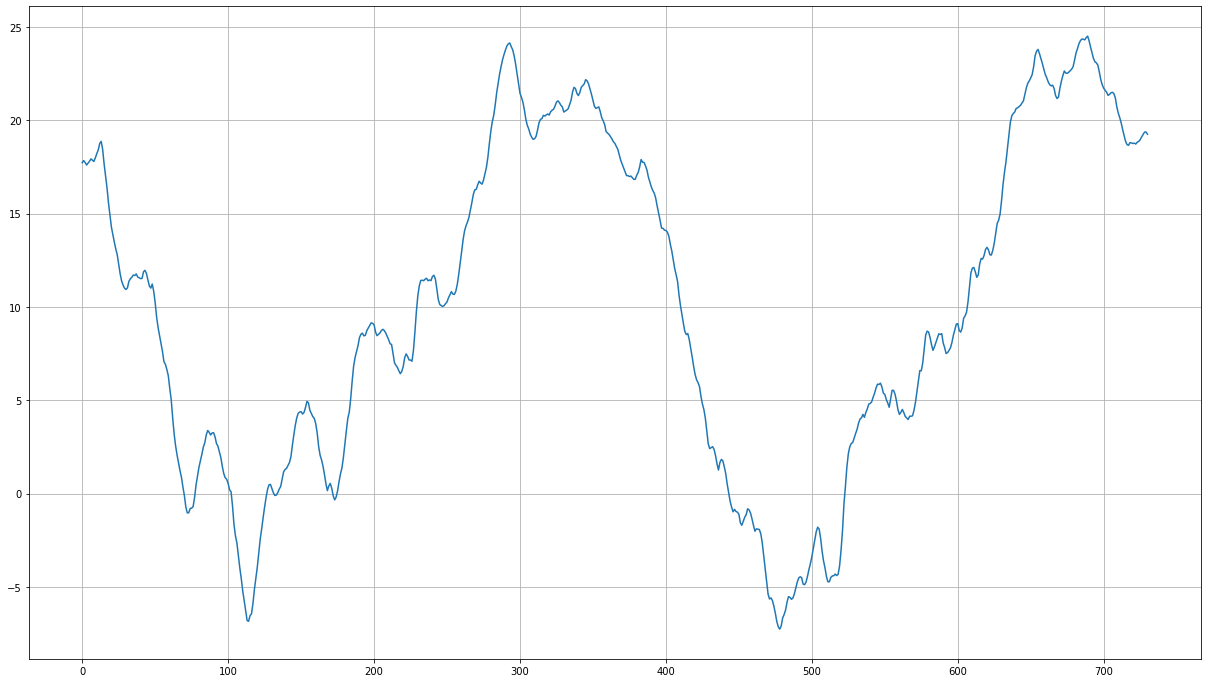

In [92]:
sngl_lctn_sample_df[TARGET].plot.line(figsize=FIG_SIZE)
plt.grid()
plt.show()